# Financial Well-Being Project: Data Exploration

Survey was administered by the Consumer Financial Protection Bureau (CFPB)

In [117]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load and Review Data

In [3]:
# Option 1: Use if loading data from local folder in Jupyter Notebook
path = Path('../resources/NFWBS_PUF_2016_data.csv')

In [ ]:
# Option 2: Use if loading data from Google Drive in Google Collab
from google.colab import drive
drive.mount('/content/drive')

path = Path('/content/drive/My Drive/Bootcamp/Project-4/NFWBS_PUF_2016_data.csv')

# Load financial well-being survey data
survey_df = pd.read_csv(path, index_col=0)

In [9]:
# Load survey data from CSV file
survey_df = pd.read_csv(path, index_col=0)

# Display sample data
print(f'Records: {len(survey_df)}')
survey_df.head()


Records: 6394


,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,...,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [37]:
# Create lists to store columns for research tools administered as part of the survey

# Financial Well-Being Scale developed by CPFB
fwb_scale = ['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
            'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4']

# Financial Skills Scale developed by CPFB
fs_scale = ['FSscore', 'FS1_1', 'FS1_2', 'FS1_3', 'FS1_4', 'FS1_5', 'FS1_6', 'FS1_7',
            'FS2_1', 'FS2_2', 'FS2_3']

# Knoll and Houts Financial Knowledge Scale 
lm_scale = ['LMscore', 'FINKNOWL1', 'FINKNOWL2', 'FINKNOWL3',
           'FK1correct', 'FK2correct', 'FK3correct']

# Knoll and Houts Financial Knowledge Scale 
kh_scale = ['KHscore', 'KHKNOWL1', 'KHKNOWL2','KHKNOWL3','KHKNOWL4','KHKNOWL5',
           'KHKNOWL6','KHKNOWL7','KHKNOWL8','KHKNOWL9', 'KH1correct', 'KH2correct',
           'KH3correct', 'KH4correct', 'KH5correct', 'KH6correct', 'KH7correct',
           'KH8correct', 'KH9correct']

In [46]:
# Create lists to store needed columns in groups/measures
#  as defined in the survey report and documentation

# Individual characteristics
ind_measures = ['PPEDUC', 'agecat', 'HEALTH', 'PPETHM', 'PPGENDER']

# Household and family characteristics
house_fam_measures = ['PPMARIT', 'PPREG4', 'HOUSING', 'HOUSESAT', 
                      'KIDS_NoChildren','KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_3']

# Income and employment
inc_emp_measures = ['fpl', 'PPINCIMP', 'VOLATILITY', 
                    'EMPLOY1_1', 'EMPLOY1_2', 'EMPLOY1_3', 'EMPLOY1_4',
                    'EMPLOY1_5', 'EMPLOY1_6', 'EMPLOY1_7', 'EMPLOY1_8', 'EMPLOY1_9', 
                    'BENEFITS_1', 'BENEFITS_2', 'BENEFITS_3',
                    'BENEFITS_4', 'BENEFITS_5', 'MILITARY']
# Note: columns removed from inc_emp: 'SOCSEC1', 'SOCSEC2', 'SOCSEC3' 

# Savings and safety nets
sav_safety_measures = ['SAVINGSRANGES', 'PRODHAVE_3', 'PRODHAVE_6',
                       'ABSORBSHOCK', 'BORROW_1', 'BORROW_2' ]

# Financial circumsstances
fin_circ_measures = ['ENDSMEET', 'MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3',
                     'MATHARDSHIP_4', 'MATHARDSHIP_5', 'MATHARDSHIP_6']

# Financial behaviors, skills and attitudes
fin_beh_measures = ['PROPPLAN_1', 'PROPPLAN_2', 'PROPPLAN_3', 'PROPPLAN_4',
                    'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3', 'MANAGE1_4',
                    'SAVEHABIT', 'GOALCONF', 'SCFHORIZON']

### Review of Financial Well-Being Scale

In [137]:
fwb_df = survey_df[fwb_scale]
fwb_df.head()

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
PUF_ID,,,,,,,,,,,
10350,55,3,3,3,3,2,3,2,3,2,4
7740,51,2,2,3,3,3,4,2,2,2,3
13699,49,3,3,3,3,3,3,3,3,3,3
7267,49,3,3,3,3,3,3,3,3,3,3
7375,49,3,3,3,3,3,3,3,3,3,3


In [13]:
# Check mean and percentiles for scoring of Financial Well-Being Scale
fwb_score = survey_df['FWBscore']
final_wt = survey_df['finalwt']
fwb_score_wt = fwb_score * final_wt

# Display mean scores and percentiles
print(f"FWB Mean Score: {fwb_score.mean()}")
print(f"FWB Mean Score (Weighted): {fwb_score_wt.mean()}")
print(f"FWB Percentiles: \n{fwb_score.quantile([.1, .25, .5, .75, .9])}")
print(f"FWB Percentiles (Weighted): \n{fwb_score_wt.quantile([.1, .25, .5, .75, .9])}")

FWB Mean Score: 56.03409446355959
FWB Mean Score (Weighted): 54.20231649953065
FWB Percentiles: 
0.10    38.0
0.25    48.0
0.50    56.0
0.75    65.0
0.90    74.0
Name: FWBscore, dtype: float64
FWB Percentiles (Weighted): 
0.10    24.753388
0.25    32.990588
0.50    46.171876
0.75    66.921936
0.90    91.481102
dtype: float64


In [138]:
# Add weighted FWB score to dataframe
survey_df['FWBscore_wt'] = fwb_score_wt

In [139]:
# Check for negative values: -1 = refused to answer, -4 = response not entered in database
fwb_df = survey_df[fwb_scale]
fwb_df[fwb_df.values < 0].groupby('PUF_ID').min()

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
PUF_ID,,,,,,,,,,,
7123,39,3,-1,5,-1,5,3,3,-1,4,-1
7197,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7214,50,3,3,3,3,3,3,-1,-1,-1,-1
7259,62,-1,5,-1,-1,-1,-1,-1,-1,-1,-1
7305,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7938,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7982,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9050,37,1,-1,4,-1,-1,4,4,-1,-1,-1
9338,58,-1,3,2,3,3,2,2,3,2,2


## Preprocessing

In [236]:
# Identify feature for dataset
feature_names = (ind_measures + house_fam_measures + inc_emp_measures + sav_safety_measures
             + fin_circ_measures + fin_beh_measures)
data_cols = feature_names + ['FWBscore'] + ['FWBscore_wt']

In [237]:
data_df = survey_df[data_cols]
data_df.describe()

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000
mean,3.160776,4.450422,3.414451,1.622771,1.475759,2.042071,2.644823,1.414295,3.303409,0.478886,...,3.254301,4.533000,3.807163,3.535033,4.204410,4.36894,3.213012,3.063341,56.034094,54.202316
std,1.178349,2.120741,1.005670,1.077631,0.499451,1.393808,1.032583,0.672763,0.863732,0.659390,...,1.027885,0.924622,1.084656,1.583223,1.071351,1.48672,0.778633,1.377079,14.154676,32.287129
min,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-4.000000,-5.015855
25%,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,...,3.000000,4.000000,3.000000,2.000000,4.000000,4.00000,3.000000,2.000000,48.000000,32.990588
50%,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,...,3.000000,5.000000,4.000000,4.000000,5.000000,5.00000,3.000000,3.000000,56.000000,46.171876
75%,4.000000,6.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,1.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,6.00000,4.000000,4.000000,65.000000,66.921936
max,5.000000,8.000000,5.000000,4.000000,2.000000,5.000000,4.000000,3.000000,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,6.00000,4.000000,5.000000,95.000000,411.597797


In [238]:
# Get count of negative values in each column
# Code Ref: https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe
data_df.lt(0).sum()

PPEDUC               0
agecat               0
HEALTH              53
PPETHM               0
PPGENDER             0
PPMARIT              0
PPREG4               0
HOUSING             42
HOUSESAT            62
KIDS_NoChildren    592
KIDS_1               1
KIDS_2               3
KIDS_3               1
KIDS_3               1
fpl                  0
PPINCIMP             0
VOLATILITY          64
EMPLOY1_1            0
EMPLOY1_2            0
EMPLOY1_3            0
EMPLOY1_4            0
EMPLOY1_5            0
EMPLOY1_6            0
EMPLOY1_7            0
EMPLOY1_8            0
EMPLOY1_9            0
BENEFITS_1          35
BENEFITS_2          34
BENEFITS_3          42
BENEFITS_4          43
BENEFITS_5          39
MILITARY            50
SAVINGSRANGES       38
PRODHAVE_3           0
PRODHAVE_6           0
ABSORBSHOCK         37
BORROW_1           176
BORROW_2           269
ENDSMEET            44
MATHARDSHIP_1       27
MATHARDSHIP_2       27
MATHARDSHIP_3       26
MATHARDSHIP_4       27
MATHARDSHIP

In [239]:
# Display rows with negative values in each column
data_to_drop = data_df[data_df.values < 0].groupby('PUF_ID').min()
data_to_drop

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7123,3,2,-1,4,1,3,4,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,39,26.715133
7132,2,1,-1,4,2,4,4,3,-1,-1,...,3,3,3,3,3,3,4,-1,43,96.698476
7133,3,4,-1,1,2,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,52,52.574041
7140,3,2,5,2,2,5,3,1,4,-1,...,5,5,5,5,5,6,4,1,26,27.394028
7149,5,8,-1,2,2,3,1,2,2,1,...,4,3,3,4,3,4,3,4,52,44.901116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,4,8,4,1,2,1,3,1,4,1,...,3,5,5,5,5,5,3,5,77,53.741093
14375,3,1,4,1,1,4,3,3,3,1,...,2,4,3,1,3,4,3,3,64,96.992448
14379,2,5,4,1,1,3,4,1,4,-1,...,4,5,3,5,5,5,4,3,56,84.522683


In [240]:
# Remove rows with negative values
data_df.drop(index=data_to_drop.index, inplace=True)
data_df

C:\Users\jeffd\AppData\Local\Temp\ipykernel_22112\3323342889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(index=data_to_drop.index, inplace=True)


,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore,FWBscore_wt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7740,2,3,3,1,1,3,2,1,3,1,...,1,4,4,1,4,1,3,3,51,67.705596
7375,2,2,3,3,1,1,2,2,3,1,...,3,3,3,3,3,4,3,3,49,208.772739
10910,4,2,5,1,1,1,2,1,4,1,...,4,5,3,5,5,4,4,1,67,50.924079
11079,4,3,3,4,2,1,2,1,2,0,...,4,5,3,5,5,5,3,3,51,69.896609
7741,1,2,2,1,2,4,2,3,2,1,...,2,1,1,1,1,2,2,2,47,56.088158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,5,7,5,2,2,1,2,1,4,0,...,3,5,3,3,4,4,3,3,61,31.872719
13118,2,6,4,2,1,1,3,1,4,0,...,4,4,4,3,5,4,3,1,59,59.897899
8709,5,2,3,1,2,1,1,2,3,1,...,4,5,5,5,4,5,3,5,59,67.039953


In [241]:
# Define features set
X = data_df.copy()
X.drop(columns=['FWBscore', 'FWBscore_wt'], axis=1, inplace=True)
X.head()

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,...,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7740,2,3,3,1,1,3,2,1,3,1,...,2,2,1,4,4,1,4,1,3,3
7375,2,2,3,3,1,1,2,2,3,1,...,3,3,3,3,3,3,3,4,3,3
10910,4,2,5,1,1,1,2,1,4,1,...,4,3,4,5,3,5,5,4,4,1
11079,4,3,3,4,2,1,2,1,2,0,...,3,3,4,5,3,5,5,5,3,3
7741,1,2,2,1,2,4,2,3,2,1,...,3,3,2,1,1,1,1,2,2,2


In [242]:
y = data_df['FWBscore'].values.reshape(-1, 1)
y[:5]

array([[51],
       [49],
       [67],
       [51],
       [47]], dtype=int64)

## Buiding the Linear Regression Model

In [148]:
# Create a model with scikit-learn
model = LinearRegression()

In [149]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [150]:
# Display model information
print(f"Model's slope: {model.coef_}\n")
print(f"Model's y-intercept: {model.intercept_}\n")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X\n")

Model's slope: [[-11.96266637  -5.12533721   0.94896125   3.02961209   9.41297333
    0.32980582   1.48481135   2.26644779   1.97588677  -1.08053394
   -1.08682922  -0.82845441   0.37662281   0.37662281  -2.28059706
    3.28619501  -0.53810769  -1.2354992   -1.21425331  -1.77077043
   -1.68467769  -0.41577223   4.86022902  -3.85436924  -1.05947782
   -4.64720986  -1.12136051  -0.99732371  -0.77128331   0.16427531
    2.39093754  -1.99194077   0.03069961  -1.20010904   1.22378037
    0.78095692  -1.0879468    1.09672606  -5.54287257  -3.81630383
   -0.75579728  -0.79659616  -2.34024283   0.94601568  -1.2813217
   -0.87844758  -0.49816498   0.10494229   0.80494941  -0.16716083
    0.32643196   0.40409076  -0.13306918   1.32872743   1.62914425
    0.82897693]]

Model's y-intercept: [71.9437597]

Model's formula: y = [71.9437597] + [-11.96266637  -5.12533721   0.94896125   3.02961209   9.41297333
   0.32980582   1.48481135   2.26644779   1.97588677  -1.08053394
  -1.08682922  -0.82845441  

In [151]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [152]:
# Create a copy of the original data
predicted_df = data_df.copy()

# Add a column with the predicted salary values
predicted_df["predicted_FWBscore"] = predicted_y_values

# Display sample data
predicted_df

,PPEDUC,agecat,HEALTH,PPETHM,PPGENDER,PPMARIT,PPREG4,HOUSING,HOUSESAT,KIDS_NoChildren,...,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,GOALCONF,SCFHORIZON,FWBscore_wt,predicted_FWBscore
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7740,2,3,3,1,1,3,2,1,3,1,...,1,4,4,1,4,1,3,3,67.705596,59.537086
7375,2,2,3,3,1,1,2,2,3,1,...,3,3,3,3,3,4,3,3,208.772739,72.936592
10910,4,2,5,1,1,1,2,1,4,1,...,4,5,3,5,5,4,4,1,50.924079,57.168116
11079,4,3,3,4,2,1,2,1,2,0,...,4,5,3,5,5,5,3,3,69.896609,61.328067
7741,1,2,2,1,2,4,2,3,2,1,...,2,1,1,1,1,2,2,2,56.088158,62.397226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,5,7,5,2,2,1,2,1,4,0,...,3,5,3,3,4,4,3,3,31.872719,33.848813
13118,2,6,4,2,1,1,3,1,4,0,...,4,4,4,3,5,4,3,1,59.897899,56.134031
8709,5,2,3,1,2,1,1,2,3,1,...,4,5,5,5,4,5,3,5,67.039953,61.539925


## Linear Regression Model Assessment

In [153]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.3420597312291329.
The r2 is 0.3420597312291329.
The mean squared error is 680.0265357591977.
The root mean squared error is 26.077318415803372.
The standard deviation is 32.149164881451036.


## Decision Tree

In [243]:
categories = ['<48', '48-65', '>65']
y = pd.qcut(data_df['FWBscore_wt'], 3, labels=categories)
y = y.values.reshape(-1, 1)
y[:5]

[['>65'], ['>65'], ['48-65'], ['>65'], ['48-65']]
Categories (3, object): ['<48' < '48-65' < '>65']

In [244]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5) # acc=.64
# model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1) # acc=.58
# model = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=2) # acc=

In [246]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions using Tree Model

In [247]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [248]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual <48", "Actual 48-65", "Actual >65"],
    columns=["Predicted <48", "Predicted 48-65", "Predicted >65"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [249]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted <48,Predicted 48-65,Predicted >65
Actual <48,240,98,105
Actual 48-65,119,301,18
Actual >65,85,29,329


Accuracy Score : 0.6570996978851964
Classification Report
              precision    recall  f1-score   support

       48-65       0.54      0.54      0.54       443
         <48       0.70      0.69      0.70       438
         >65       0.73      0.74      0.74       443

    accuracy                           0.66      1324
   macro avg       0.66      0.66      0.66      1324
weighted avg       0.66      0.66      0.66      1324



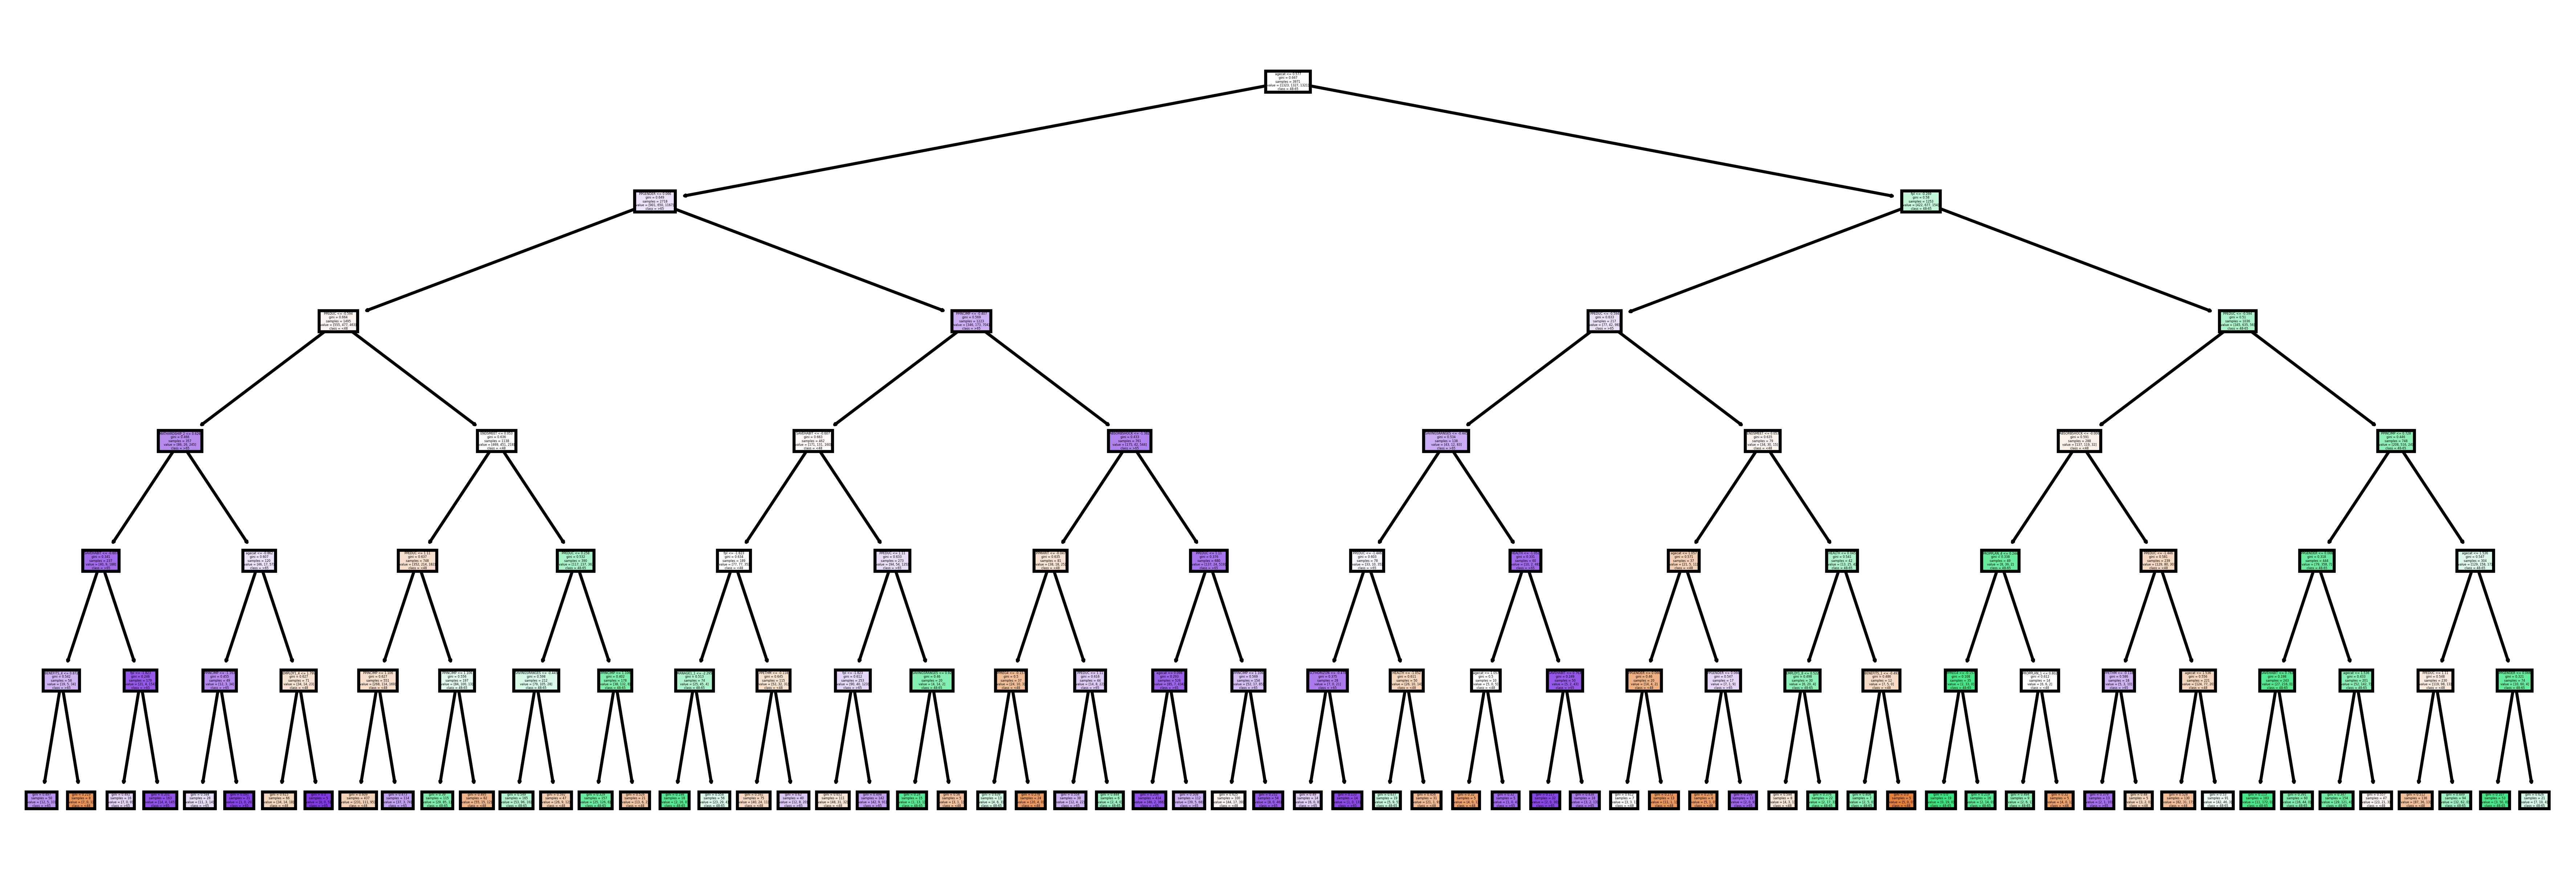

In [182]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=600)
tree.plot_tree(model, feature_names=feature_names, class_names=categories, filled=True)
plt.savefig('test.png')

## Random Forest

In [250]:
from sklearn.ensemble import RandomForestClassifier
num_estimators = 100
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=num_estimators, random_state=78,
                                  max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [251]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\jeffd\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [252]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [253]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual <48", "Actual 48-65", "Actual >65"],
    columns=["Predicted <48", "Predicted 48-65", "Predicted >65"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [254]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted <48,Predicted 48-65,Predicted >65
Actual <48,231,116,96
Actual 48-65,76,344,18
Actual >65,68,22,353


Accuracy Score : 0.7009063444108762
Classification Report
              precision    recall  f1-score   support

       48-65       0.62      0.52      0.56       443
         <48       0.71      0.79      0.75       438
         >65       0.76      0.80      0.78       443

    accuracy                           0.70      1324
   macro avg       0.70      0.70      0.70      1324
weighted avg       0.70      0.70      0.70      1324



In [ ]:
# Loop to plot each estimater
# Code ref: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fig, axes = plt.subplots(nrows = 1,ncols = num_estimators,figsize = (15,5), dpi=600)
for index in range(0, num_estimators):
    tree.plot_tree(rf_model.estimators_[index],
                   feature_names = feature_names, 
                   class_names=categories,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
plt.savefig('rf_1.png')

In [231]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08077768752293726, 'agecat'),
 (0.08060252533097419, 'PPEDUC'),
 (0.058311935762389286, 'PPINCIMP'),
 (0.03836467457147638, 'SAVINGSRANGES'),
 (0.038306870070311576, 'PPGENDER'),
 (0.030083166045016364, 'SCFHORIZON'),
 (0.0293317098653071, 'SAVEHABIT'),
 (0.02899526830438351, 'PPREG4'),
 (0.025477200307513544, 'HEALTH'),
 (0.024974440501581822, 'MANAGE1_3'),
 (0.02426373785498832, 'PROPPLAN_4'),
 (0.023898795268728543, 'PROPPLAN_1'),
 (0.0231526041522196, 'PROPPLAN_2'),
 (0.02273052475295358, 'fpl'),
 (0.022681366529542526, 'MANAGE1_2'),
 (0.021634989438468546, 'PROPPLAN_3'),
 (0.021540709659083772, 'MANAGE1_4'),
 (0.020619282852741585, 'ENDSMEET'),
 (0.020251556970558967, 'ABSORBSHOCK'),
 (0.019991084338038905, 'PPETHM'),
 (0.019910649823907237, 'PPMARIT'),
 (0.019816839469484343, 'GOALCONF'),
 (0.019432933318562426, 'HOUSESAT'),
 (0.01672003984691144, 'EMPLOY1_8'),
 (0.01512393986489794, 'KIDS_NoChildren'),
 (0.014646017707786507, 'BORROW_2'),
 (0.014483586287628596, 'BORROW_1'),